# Non Sequential Model (Complex Model)

One Example of non-sequential neural network is wide and deep neural network. It connects all or part of the inputs directly to the output layer, as shown in given below flow chart. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rule (through the small path). In contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transformations

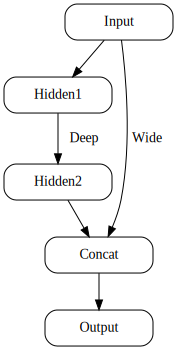

In [1]:
from graphviz import Digraph
from IPython.display import display

def generate_flow_chart():
    # Initialize Digraph object
    dot = Digraph()

    # Add nodes
    dot.node('A', 'Input',shape="rectangle", style="rounded",width='1.5', height='0.5')
    dot.node('B', 'Hidden1',shape="rectangle", style="rounded",width='1.5', height='0.5')
    dot.node('C', 'Hidden2',shape="rectangle", style="rounded",width='1.5', height='0.5')
    dot.node('D', 'Concat',shape="rectangle", style="rounded",width='1.5', height='0.5')
    dot.node('E', 'Output',shape="rectangle", style="rounded",width='1.5', height='0.5')
    

    # Add edges with labels
    dot.edge('A', 'B')
    dot.edge('B', 'C', label='     Deep ')
    dot.edge('C', 'D')
    dot.edge('A','D',label="   Wide")
    dot.edge("D",'E')

    return dot

# Generate flow chart
flow_chart = generate_flow_chart()

# Display flow chart in Jupyter Notebook cell
display(flow_chart)


# Lets dive into code to tackle california housing problem

In [2]:
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing= fetch_california_housing()

In [4]:
x_train_full,x_test,y_train_full,y_test=train_test_split(housing.data,housing.target)

In [5]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full)

In [9]:
input= keras.layers.Input(shape=x_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output=keras.layers.Dense(1)(concat)

In [13]:
model = keras.models.Model(inputs=[input], outputs=[output])

In [14]:
model.compile(loss="mean_squared_error",optimizer="sgd")

Scaling the datasets

In [10]:
scaler=StandardScaler()

In [11]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
x_valid_scaled=scaler.fit_transform(x_valid)

In [15]:
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================] - 0s 1

In [16]:
mse_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: nan
